Jahan jahan bhi location di ho, for example "M:/Minor Project sem 5/dataset/training/lightning/1845.jpg" iss type se, wahan location change krna h uss jagah ki, jidhar dataset save kiya h.

1. Importing Dependencies

In [8]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.preprocessing.image import ImageDataGenerator
from keras.utils import array_to_img, img_to_array, load_img
from tensorflow.python.client import device_lib
from keras.utils.vis_utils import model_to_dot

In [9]:
from IPython.display import SVG
from PIL import Image
import seaborn as sns

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os


tf.test.gpu_device_name()
device_lib.list_local_devices()

[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 10593132714848550268
 xla_global_id: -1]

Sample Images

(243, 286)


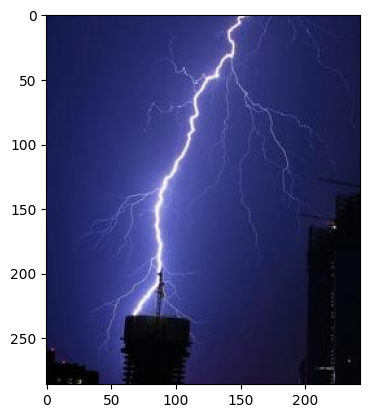

In [10]:
# lightning
img = Image.open("M:/Minor Project sem 5/dataset/training/lightning/1845.jpg")
print(img.size)
plt.imshow(img)

(538, 391)


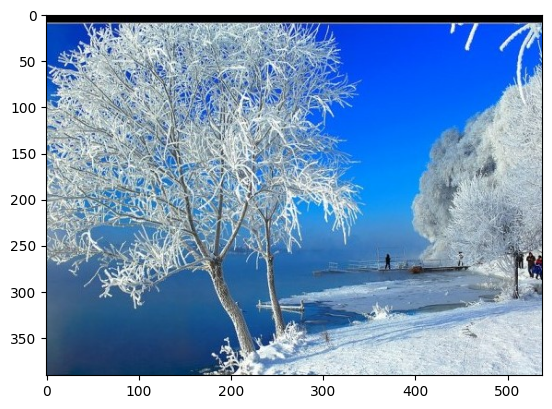

In [11]:
#cloudy
img = Image.open("M:/Minor Project sem 5/dataset/training/rime/4933.jpg")
print(img.size)
plt.imshow(img)

3. Image Processing and Data Augmentation

In [12]:
!mkdir preview
from keras.preprocessing.image import ImageDataGenerator
from keras.utils import array_to_img, img_to_array, load_img

datagen = ImageDataGenerator(
        rotation_range=30,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest')

img = load_img("M:/Minor Project sem 5/dataset/training/rime/4949.jpg")  # this is a PIL image
x = img_to_array(img)  # this is a Numpy array with shape
x = x.reshape((1,) + x.shape)  # this is a Numpy array with shape

# the .flow() command below generates batches of randomly transformed images
# and saves the results to the `preview/` directory
i = 0
for batch in datagen.flow(x, batch_size=1,
                          save_to_dir='preview', save_prefix='rain', save_format='jpg'):
    i += 1
    if i > 20:
        break  # otherwise the generator would loop indefinitely

A subdirectory or file preview already exists.


In [13]:
BATCH_SIZE = 32
IMAGE_SIZE = 150

# this is the augmentation configuration we will use just for training
train_datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=40,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)

# this is the augmentation configuration we will use for validation:
# only for rescaling
validation_datagen = ImageDataGenerator(rescale=1./255)

# this is the augmentation configuration we will use for testing:
# only for rescaling
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        "M:/Minor Project sem 5/dataset/training",  # this is the target directory
        target_size=(IMAGE_SIZE, IMAGE_SIZE),  # all images will be resized to 150x150
        batch_size=BATCH_SIZE,
        class_mode='categorical')

# this is a similar generator, for validation data
validation_generator = validation_datagen.flow_from_directory(
        "M:/Minor Project sem 5/dataset/validation", #this is the validation directory
        target_size=(IMAGE_SIZE, IMAGE_SIZE),
        batch_size=BATCH_SIZE,
        class_mode='categorical')

# this is a similar generator, for test data
test_generator = validation_datagen.flow_from_directory(
        "M:/Minor Project sem 5/dataset/test", #this is the validation directory
        target_size=(IMAGE_SIZE, IMAGE_SIZE),
        batch_size=BATCH_SIZE,
        class_mode='categorical')



Found 4608 images belonging to 11 classes.
Found 1126 images belonging to 11 classes.
Found 1128 images belonging to 11 classes.


4. Model Implementation

In [14]:
# Model 1 Architecture

keras.backend.clear_session()

input_layer = keras.layers.Input(shape=(IMAGE_SIZE, IMAGE_SIZE, 3))

# Convolutional Layers
conv_layer = keras.layers.Conv2D(32, (3, 3), activation="relu", padding="same")(input_layer)
conv_layer = keras.layers.Conv2D(16, (3, 3), activation="relu", padding="same")(conv_layer)
pooling_layer = keras.layers.MaxPool2D(pool_size=(2, 2))(conv_layer)

# Fully connected layers
flatten = keras.layers.Flatten()(pooling_layer)
dense = keras.layers.Dense(200, activation="relu")(flatten)
dropout = keras.layers.Dropout(0.5)(flatten)

classifier = keras.layers.Dense(11, activation="softmax")(dropout)   # since we have 11 classes

model = keras.Model(inputs=input_layer, outputs=classifier)
opt = keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer = opt, loss = 'categorical_crossentropy', metrics="accuracy")
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 conv2d (Conv2D)             (None, 150, 150, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 150, 150, 16)      4624      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 75, 75, 16)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 90000)             0         
                                                                 
 dropout (Dropout)           (None, 90000)             0         
                                                             

Visualization of the model


[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: C:\Users\marka\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.


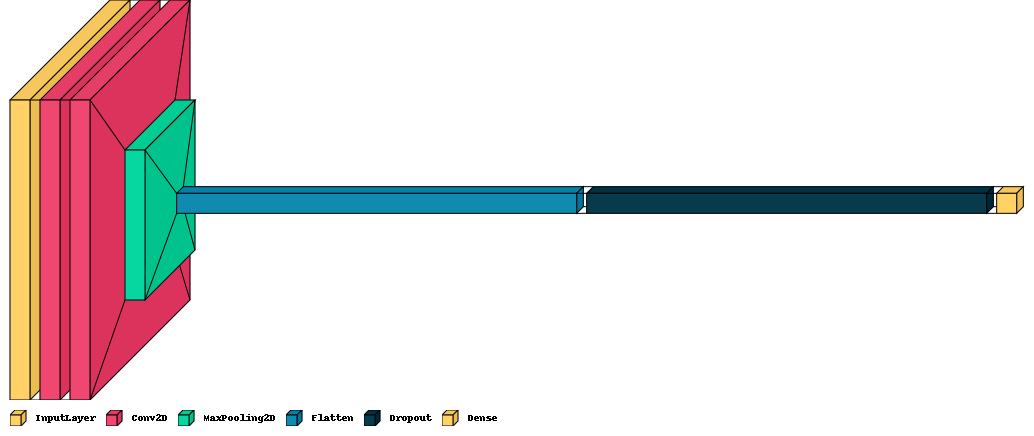

In [15]:
%pip install visualkeras
import visualkeras

visualkeras.layered_view(model).show() # display using your system viewer
visualkeras.layered_view(model, legend=True,scale_xy=2)

Model 2 Architecture

In [16]:
keras.backend.clear_session()

input_layer = keras.layers.Input(shape=(IMAGE_SIZE, IMAGE_SIZE, 3))

# Convolution layers
conv_layer = keras.layers.Conv2D(32, (3, 3), activation="relu", padding="same")(input_layer)
conv_layer = keras.layers.Conv2D(32, (3, 3), activation="relu", padding="same")(conv_layer)
pooling_layer = keras.layers.MaxPool2D(pool_size=(2, 2))(conv_layer)

conv_layer = keras.layers.Conv2D(64, (3,3), activation="relu", padding="same")(pooling_layer)
conv_layer = keras.layers.Conv2D(64, (3,3), activation="relu", padding="same")(conv_layer)
pooling_layer = keras.layers.MaxPool2D(pool_size=(2,2))(conv_layer)

# fully connected layer
flatten = keras.layers.Flatten()(pooling_layer)
dense = keras.layers.Dense(200, activation="relu")(flatten)
dropout = keras.layers.Dropout(0.5)(dense)
dense = keras.layers.Dense(100, activation="relu")(dropout)
dropout = keras.layers.Dropout(0.2)(dense)

classifier = keras.layers.Dense(11, activation="softmax")(dropout)

model2 = keras.Model(inputs = input_layer, outputs = classifier)
opt = keras.optimizers.Adam(learning_rate=0.001)
model2.compile(optimizer=opt, loss="categorical_crossentropy",metrics=['accuracy'])
model2.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 conv2d (Conv2D)             (None, 150, 150, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 150, 150, 32)      9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 75, 75, 32)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 75, 75, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 75, 75, 64)        36928     
                                                             

Visualizing the second model

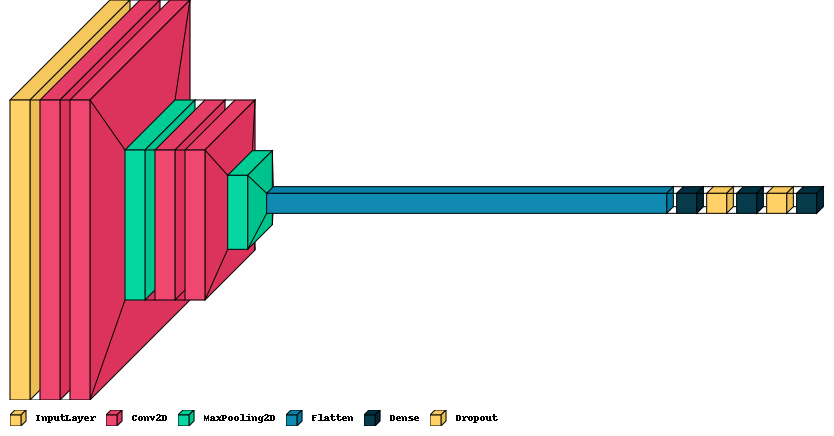

In [17]:
visualkeras.layered_view(model2).show() # display using your system viewer
visualkeras.layered_view(model2, legend=True,scale_xy=2)

5. Training the model

VGG16

In [25]:
# VGG16
from keras.applications import VGG16
vgg16 = VGG16(weights='imagenet',
              include_top=False,
              input_shape=(IMAGE_SIZE, IMAGE_SIZE, 3))
print(vgg16.summary())


Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 150, 150, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 150, 150, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 75, 75, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 75, 75, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 75, 75, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 37, 37, 128)       0     

In [26]:
keras.backend.clear_session() #clear model numbers

for layer in vgg16.layers:
    layer.trainable = False
    
model_t = tf.keras.models.Sequential([
        # our vgg16_base model added as a layer
        vgg16,
        # here is our custom prediction layer (same as before)
        keras.layers.Flatten(),    
        keras.layers.Dense(512, activation="relu"),           
        keras.layers.Dropout(0.5),                 
        keras.layers.Dense(256, activation="relu"),           
        keras.layers.Dense(11, activation="softmax")    
    ])

model_t.compile(optimizer='adam', 
                loss='categorical_crossentropy',
                metrics=['accuracy'])

model_t.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 4, 4, 512)         14714688  
                                                                 
 flatten (Flatten)           (None, 8192)              0         
                                                                 
 dense (Dense)               (None, 512)               4194816   
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 dense_1 (Dense)             (None, 256)               131328    
                                                                 
 dense_2 (Dense)             (None, 11)                2827      
                                                                 
Total params: 19,043,659
Trainable params: 4,328,971
Non

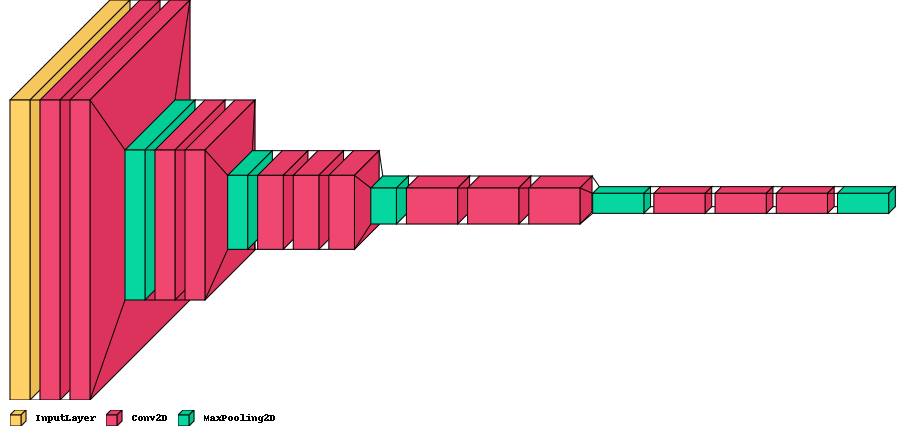

In [27]:
visualkeras.layered_view(vgg16).show() # display vgg16 model architecture
visualkeras.layered_view(vgg16, legend=True,scale_xy=2)

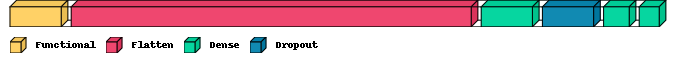

In [28]:
# viewing the final model based on VGG16
visualkeras.layered_view(model_t).show()
visualkeras.layered_view(model_t, legend=True,scale_xy=2)

In [29]:
# training the model
history3 = model_t.fit(train_generator,validation_data=validation_generator, epochs=20)

Epoch 1/20
144/144 [==============================] - 306s 2s/step - loss: 1.4720 - accuracy: 0.5054 - val_loss: 1.0786 - val_accuracy: 0.6146
Epoch 2/20
144/144 [==============================] - 300s 2s/step - loss: 1.0688 - accuracy: 0.6239 - val_loss: 0.8919 - val_accuracy: 0.6661
Epoch 3/20
144/144 [==============================] - 288s 2s/step - loss: 0.9703 - accuracy: 0.6628 - val_loss: 0.8735 - val_accuracy: 0.6936
Epoch 4/20
144/144 [==============================] - 291s 2s/step - loss: 0.8858 - accuracy: 0.6923 - val_loss: 0.8080 - val_accuracy: 0.7336
Epoch 5/20
144/144 [==============================] - 305s 2s/step - loss: 0.8758 - accuracy: 0.6914 - val_loss: 0.7971 - val_accuracy: 0.7176
Epoch 6/20
144/144 [==============================] - 302s 2s/step - loss: 0.8175 - accuracy: 0.7109 - val_loss: 0.7727 - val_accuracy: 0.7291
Epoch 7/20
144/144 [==============================] - 294s 2s/step - loss: 0.7961 - accuracy: 0.7194 - val_loss: 0.8022 - val_accuracy: 0.7229

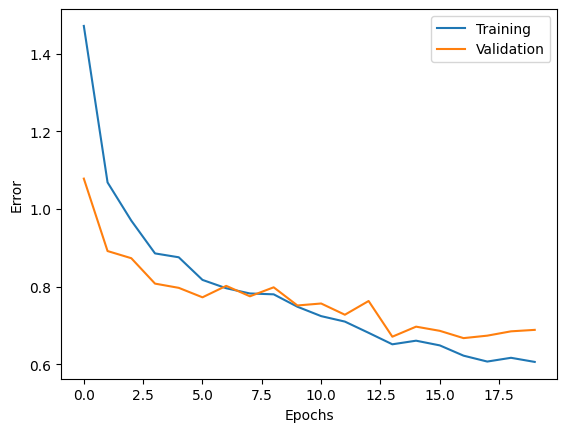

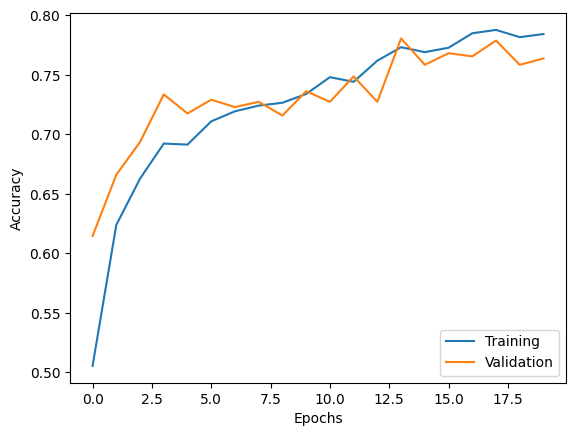

In [30]:
# plotting of vgg
plot_curves(history3.history)

ResNet Architecture

In [37]:
from keras.applications import ResNet152V2
resnet = ResNet152V2(weights="imagenet",
                     include_top=False,
                     input_shape=(IMAGE_SIZE, IMAGE_SIZE, 3))
print(resnet.summary())

A local file was found, but it seems to be incomplete or outdated because the auto file hash does not match the original value of ed17cf2e0169df9d443503ef94b23b33 so we will re-download the data.
234545216/234545216 [==============================] - 432s 2us/step
Model: "resnet152v2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 150, 150, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 156, 156, 3)  0           ['input_2[0][0]']                
                                                                                                  
 conv1_conv (Conv2D) 

In [38]:
keras.backend.clear_session() #clear model numbers

for layer in resnet.layers:
    layer.trainable = False
    
model_res = tf.keras.models.Sequential([
        # ourresnet_base model added as a layer
        resnet,
        # here is our custom prediction layer (same as before)
        keras.layers.Flatten(),    
        keras.layers.Dense(512, activation="relu"),           
        keras.layers.Dropout(0.5),                 
        keras.layers.Dense(256, activation="relu"),           
        keras.layers.Dense(11, activation="softmax")    
    ])

model_res.compile(optimizer='adam', 
                loss='categorical_crossentropy',
                metrics=['accuracy'])

model_res.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet152v2 (Functional)    (None, 5, 5, 2048)        58331648  
                                                                 
 flatten (Flatten)           (None, 51200)             0         
                                                                 
 dense (Dense)               (None, 512)               26214912  
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 dense_1 (Dense)             (None, 256)               131328    
                                                                 
 dense_2 (Dense)             (None, 11)                2827      
                                                                 
Total params: 84,680,715
Trainable params: 26,349,067
No

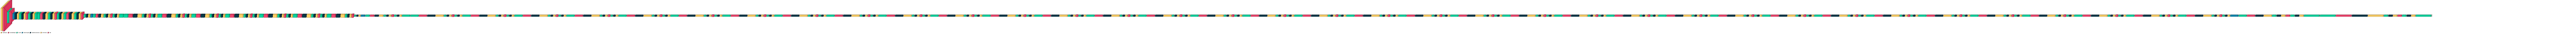

In [39]:
visualkeras.layered_view(resnet).show() # display vgg16 model architecture
visualkeras.layered_view(resnet, legend=True,scale_xy=2)

In [40]:
# training the model
history6 = model_res.fit(train_generator,validation_data=validation_generator, epochs=20)

Epoch 1/20
144/144 [==============================] - 434s 3s/step - loss: 2.6008 - accuracy: 0.6003 - val_loss: 1.0754 - val_accuracy: 0.6732
Epoch 2/20
144/144 [==============================] - 420s 3s/step - loss: 1.3009 - accuracy: 0.6623 - val_loss: 1.2373 - val_accuracy: 0.6599
Epoch 3/20
144/144 [==============================] - 411s 3s/step - loss: 1.1537 - accuracy: 0.6840 - val_loss: 1.0707 - val_accuracy: 0.6963
Epoch 4/20
144/144 [==============================] - 401s 3s/step - loss: 1.1292 - accuracy: 0.7014 - val_loss: 0.9168 - val_accuracy: 0.7327
Epoch 5/20
144/144 [==============================] - 406s 3s/step - loss: 1.0257 - accuracy: 0.7188 - val_loss: 1.0018 - val_accuracy: 0.7158
Epoch 6/20
144/144 [==============================] - 454s 3s/step - loss: 0.9875 - accuracy: 0.7294 - val_loss: 1.0525 - val_accuracy: 0.7158
Epoch 7/20
144/144 [==============================] - 417s 3s/step - loss: 0.9743 - accuracy: 0.7337 - val_loss: 1.0350 - val_accuracy: 0.7034

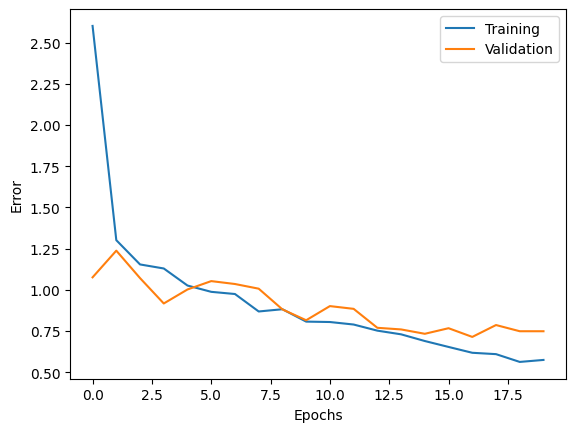

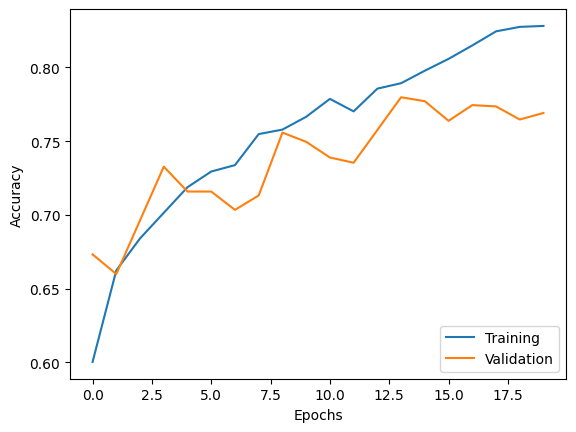

In [41]:
# plotting of resnet
plot_curves(history6.history)

6. Calculating the loss

In [ ]:
import matplotlib.pyplot as plt
def plot_curves(history):
  plt.figure()
  plt.xlabel('Epochs')
  plt.ylabel('Error')
  plt.plot(history['loss'])
  plt.plot(history['val_loss'])
  plt.legend(['Training', 'Validation'])

  plt.figure()
  plt.xlabel('Epochs')
  plt.ylabel('Accuracy')
  plt.plot(history['accuracy'])
  plt.plot(history['val_accuracy'])
  plt.legend(['Training', 'Validation'], loc='lower right');